<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week09/Day2/DC2/W9D2DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily Challenge : Run Code Llama on Kaggle using Gemma#

Last Updated: April 29th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn
How to run open-source LLMs like Code Llama on Kaggle using llama.cpp
How to install and configure Gemma with CUDA support
How to convert Hugging Face models
How to generate code and text using Code Llama

🛠️ What you will create
You’ll deploy Code Llama 7B on Kaggle and generate Python code through prompts. You’ll also explore small exercises to play with inference using your own ideas!

Warning : The Code Llama 7B model is not being publicly accessible on Kaggle without an approved access request.
To do this exercise you will first need to request for access (which should not take too long) here

In case you don’t get approved, you can consider the following alternative to avoid access requests : you will opt for a smaller and publicly available language model llama2-7b-chat that doesn’t require access requests. Download the Code Llama 7B model weights from Hugging Face and upload them to your Kaggle working directory or a publicly accessible storage location like Google Drive. You can then load the model from the downloaded weights.

!pip install llama-cpp-python --verbose

!wget https://huggingface.co/MaziyarPanahi/gemma-3-1b-it-GGUF/resolve/main/gemma-3-1b-it.Q8_0.gguf -O gemma-3-1b-it-Q8_0.gguf # Gemma 3 1B model Q8 in GGUF format (compatible with Llama)

🛠️ What you will use?
The method: using llama.cpp and llama-cpp-python for efficient inference
The models: Code Llama 7B (or llama2-7b-chat as fallback) and Gemma
The tools: Hugging Face, GGUF conversion, CUDA bindings


💼 Prerequisites
Kaggle account with GPU enabled
(Optional) Access approved for Code Llama 7B
Python basics and comfort with command line

#Task

**Part 1 : Install llama-cpp-python with CUDA bindings and clone the llama.cpp GitHub repository.**


**Part 2 : Model Preparation : Convert the Hugging Face Code Llama model into GGUF format (optimized for llama.cpp).**


**Part 3 : Load the converted model using the llama-cpp-python bindings.**


#**Part 1 : Install llama-cpp-python with CUDA bindings and clone the llama.cpp GitHub repository.**

1. Create a new Kaggle or Google Colaboratory notebook with GPU runtime.

2. Install dependencies:

!pip install llama-cpp-python --verbose
3. Clone llama.cpp:

!git clone https://github.com/ggerganov/llama.cpp.git


What you’ll use:

Kaggle or Colab notebook UI
pip for package installation
git for repository cloning

**1. Create a new Kaggle or Google Colaboratory notebook with GPU runtime.**

*# Fait - le notebook colab en cours*

**2. Install dependencies:**

In [ ]:
!pip install llama-cpp-python --verbose

**3. Clone llama.cpp:**

In [ ]:
!git clone https://github.com/ggerganov/llama.cpp.git

Cloning into 'llama.cpp'...
remote: Enumerating objects: 58076, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 58076 (delta 140), reused 46 (delta 46), pack-reused 57855 (from 4)
Receiving objects: 100% (58076/58076), 137.96 MiB | 11.77 MiB/s, done.
Resolving deltas: 100% (41990/41990), done.


#**Part 2 : Model Preparation : Convert the Hugging Face Code Llama model into GGUF format (optimized for llama.cpp).**

**Option A:** Code Llama 7B (if approved)

Request and download the model via Kaggle UI.

Convert to GGUF for llama.cpp:

cd llama.cpp python3 convert-hf-to-gguf.py
--model hf/metaresearch/codellama-7b-pytorch
--outfile codellama-7b.gguf

**Option B:**
1. llama2-7b-chat (public fallback)
2. Download weights from Hugging Face:
!wget https://huggingface.co/llama2/7b-chat/resolve/main/llama2-7b-chat.gguf


==> **B option was chosen and implemented**

**1. Request and download the model via Kaggle UI - llama2-7b-chat (public fallback).**

In [ ]:
!pip install llama-stack

In [ ]:
!llama model list --show-all # A list of models to be selected in the Hugging Face Repo

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Model Descriptor(ID)         ┃ Hugging Face Repo            ┃ Context Length ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Llama-2-7b                   │ meta-llama/Llama-2-7b        │ 4K             │
├──────────────────────────────┼──────────────────────────────┼────────────────┤
│ Llama-2-13b                  │ meta-llama/Llama-2-13b       │ 4K             │
├──────────────────────────────┼──────────────────────────────┼────────────────┤
│ Llama-2-70b                  │ meta-llama/Llama-2-70b       │ 4K             │
├──────────────────────────────┼──────────────────────────────┼────────────────┤
│ Llama-2-7b-chat              │ meta-llama/Llama-2-7b-chat   │ 4K             │
├──────────────────────────────┼──────────────────────────────┼────────────────┤
│ Llama-2-13b-chat             │ meta-llama/Llama-2-13b-chat  │ 4K             │
├───────────────────────────

In [ ]:
!llama download --source meta --model-id Llama-2-7b # Model chosen and uploaded from Hugging Face Repo

In [ ]:
!llama model verify-download --model-id Llama-2-7b ## Vérification de l'installation du modèle choisi depuis Hugging Face Repo#/



Verification Results:
✓ consolidated.00.pth: Verified
✓ params.json: Verified

All files verified successfully!


Uploading has been checked and was successfully implemented. All files were successfully checked.

**2. Download weights from Hugging Face (conversion of the Hugging Face Code Llama model into GGUF format - optimized for llama.cpp)**

In [ ]:
!wget https://huggingface.co/TheBloke/Llama-2-7B-Chat-GGUF/resolve/main/llama-2-7b-chat.Q4_K_M.gguf


--2025-08-02 14:35:01--  https://huggingface.co/TheBloke/Llama-2-7B-Chat-GGUF/resolve/main/llama-2-7b-chat.Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 3.165.160.61, 3.165.160.59, 3.165.160.12, ...
Connecting to huggingface.co (huggingface.co)|3.165.160.61|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/b0/ca/b0cae82fd4b3a362cab01d17953c45edac67d1c2dfb9fbb9e69c80c32dc2012e/08a5566d61d7cb6b420c3e4387a39e0078e1f2fe5f055f3a03887385304d4bfa?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27llama-2-7b-chat.Q4_K_M.gguf%3B+filename%3D%22llama-2-7b-chat.Q4_K_M.gguf%22%3B&Expires=1754148635&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1NDE0ODYzNX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9iMC9jYS9iMGNhZTgyZmQ0YjNhMzYyY2FiMDFkMTc5NTNjNDVlZGFjNjdkMWMyZGZiOWZiYjllNjljODBjMzJkYzIwMTJlLzA4YTU1NjZkNjFkN2NiNmI0MjBjM2U0Mzg3YTM5ZTAwNzhlMWYyZmU1ZjA1NWYzYTAzODg3Mzg1M

Weights have been uploaded from HuggingFace in order to convert the HuggingFace code Llama into GGUF format, optimized for Llama.cpp.

#**Part 3 : Load the converted model using the llama-cpp-python bindings.**

1. Initialize the Python environment:

from llama_cpp import Llama
2. Load the GGUF model:

llm = Llama(
   model_path="...",
   n_gpu_layers=..,       # adjust for GPU memory
   n_threads=...
)
3. Generate text using a natural language prompt (e.g., ask about the solar system)

prompt = "Explain how the solar system formed."
output = llm(prompt=..., max_tokens=...)
print(output["choices"][0]["text"])
4. Generate Python code by prompting the model to write a script (e.g., loading a model with Hugging Face)

output_stream = llm(
   prompt="Write a Python script that loads a Hugging Face model and tokenizes input.",
   max_tokens=...,
   stream=True
)
for token_info in output_stream:
   print(token_info["..."], end="", flush=True)


What you’ll use:

llama_cpp.Llama bindings
Model path and hardware configuration
Prompt engineering fundamentals
Streaming inference API
Hint : (complete code to fill where there is “…”)




from llama_cpp import Llama

llm = ...

prompt = ...

output = ...
print(output["choices"][0]["text"])

output_stream = llm(
    ...,
    max_tokens=...,
    stream=True  # Enable streaming
)

Iterate through the tokens and print them at the same time they are computed

for output in output_stream:
    token = ...
    print(token, end="", flush=True)

**1. Initialize the Python environment:**




In [ ]:
from llama_cpp import Llama

Python environment initialized.

**2. Load the GGUF model:**

In [ ]:
llm = Llama(
    model_path="llama-2-7b-chat.Q4_K_M.gguf",  # Replace with the actual path to your GGUF model file
    n_gpu_layers=0,  # Adjust for GPU memory. Set to 0 to use CPU.
    n_threads=None   # Use default number of threads
)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from llama-2-7b-chat.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 

GGUF model uploaded.

**3.Generate text using a natural language prompt (e.g., ask about the solar system)**

In [ ]:
prompt = "Explain how the solar system formed."
output = llm(prompt, max_tokens=32)
print(output["choices"][0]["text"])



Llama.generate: 1 prefix-match hit, remaining 8 prompt tokens to eval
llama_perf_context_print:        load time =    5214.04 ms
llama_perf_context_print: prompt eval time =    2581.44 ms /     8 tokens (  322.68 ms per token,     3.10 tokens per second)
llama_perf_context_print:        eval time =   20271.29 ms /    31 runs   (  653.91 ms per token,     1.53 tokens per second)
llama_perf_context_print:       total time =   22870.43 ms /    39 tokens


 nobody really knows how the solar system formed. but there are several theories that scientists have developed over the years. one of the most widely accepted theories is the


Text generated using a natural language prompt '"Explain how the solar system formed."'.

**4. Generate Python code by prompting the model (e.g.,"Write a Python script that loads a Hugging Face model and tokenizes input.")**

In [ ]:
output_stream = llm(
   prompt="Write a Python script that loads a Hugging Face model and tokenizes input.",
    max_tokens=256, # Increased max_tokens for a more complete script
    stream=True  # Enable streaming
)

# Iterate through the tokens and print them at the same time they are computed
for token_info in output_stream:
    token = token_info["choices"][0]["text"]
    print(token, sep = "/n", end="", flush=True)

Llama.generate: 17 prefix-match hit, remaining 1 prompt tokens to eval


 surely, you can use the `from_pretrained` method to load a model. Here's an example of how you can use it to load a BERT model:
```
import torch
from transformers import BertTokenizer, BertModel

# Load the BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Test the tokenizer
text = "This is a sample input text."
input_ids = tokenizer.encode_plus(text, 
```
In this example, we first load the BERT model using the `from_pretrained` method. This method takes the name of the model checkpoint as an argument and returns a `BertModel` instance.
Next, we load the tokenizer using the `from_pretrained` method. This method takes the name of the tokenizer checkpoint as an argument and returns a `BertTokenizer` instance.
Finally, we test the tokenizer by calling the `encode_plus` method on it and passing

llama_perf_context_print:        load time =    5214.04 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =  166546.93 ms /   256 runs   (  650.57 ms per token,     1.54 tokens per second)
llama_perf_context_print:       total time =  167083.62 ms /   257 tokens


Python code generated by prompting the model: prompt="Write a Python script that loads a Hugging Face model and tokenizes input."

**Bonus Exercises 🎯**

Try these fun and simple prompts to test Code Llama’s coding ability:

**I tested bonus exercises 1 & 2.**

1. Ask Code Llama to generate a function that checks if a number is prime.

2. Prompt it to create a script that reads a CSV file and plots a line chart using matplotlib.

**1. Ask Code Llama to generate a function that checks if a number is prime.**

In [ ]:
#Génération du prompt via llama
prompt = "Ask Code Llama to generate a function that checks if a number is prime."
output = llm(prompt, max_tokens=256)
print(output["choices"][0]["text"])

Llama.generate: 17 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    5214.04 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =  167734.13 ms /   256 runs   (  655.21 ms per token,     1.53 tokens per second)
llama_perf_context_print:       total time =  167927.88 ms /   257 tokens



I am glad you asked! Here is a function that checks if a number is prime:
```
def is_prime(n):
    if n <= 1 or n % 2 == 0:
        return False
    for i in range(3, int(n ** 0.5) + 1, 2):
        if n % i == 0:
            return False
    return True
```
This function uses the Sieve of Eratosthenes algorithm to check if a number is prime. The function starts by checking if the number is less than or equal to 1, or if it is even. If it is, then it is not prime, so the function returns `False`.
If the number is greater than 1 and even, the function then checks if it is divisible by any prime number less than or equal to the square root of the number. If it is, then it is not prime, so the function returns `False`.
If the number is greater than 1 and not even, then it is prime, so the function returns `True`.
Here is an example of how you can use this function:
```
n = 23


In [ ]:
#Vérification du prompt généré par llama
# Résultat : Code généré OK
def is_prime(n):
    if n <= 1 or n % 2 == 0:
        return False
    for i in range(3, int(n ** 0.5) + 1, 2):
        if n % i == 0:
            return False
    return True


n = 23
print(is_prime(n))

True


Llama's ability to code tested by asking code Llama if a number is prime.

Code has been generated correctly.

**2. Prompt Llama to create a script that reads a CSV file and plots a line chart using matplotlib.**

In [ ]:
#Génération du code via llama
prompt = "Create a script that reads a CSV file and plots a line chart using matplotlib"
output = llm(prompt, max_tokens=512)
print(output["choices"][0]["text"])


Llama.generate: 15 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    5214.04 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =  226026.40 ms /   354 runs   (  638.49 ms per token,     1.57 tokens per second)
llama_perf_context_print:       total time =  226331.30 ms /   355 tokens




import matplotlib.pyplot as plt
import csv

# Load the CSV file
with open('data.csv', 'r') as f:
    reader = csv.DictReader(f)

# Plot the data
plt.plot(reader['date'], reader['value'])

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

This script will read a CSV file named "data.csv" and plot a line chart of the data in the file. The script uses the `csv` module to read the file and the `matplotlib.pyplot` module to create the plot.
The script first loads the CSV file using the `open()` function in read mode (`'r'`). The `csv.DictReader()` function is then used to read the file and create a dictionary of the data in the file, where the keys are the column names and the values are the data values.
The script then uses the `plot()` function to plot the data, passing in the column names as the x-axis and y-axis values. The `xlabel()` and `ylabel()` functions are used to add axis labels to the plot.
Finally, the script uses the `show()` function to 

In [ ]:
#Vérification du prompt généré par llama
# Résultat ==> le code renvoie une erreur : 'DictReader' object is not subscriptable**

import matplotlib.pyplot as plt
import csv

# Load the CSV file
with open('data.csv', 'r') as f:
    reader = csv.DictReader(f)

# Plot the data
plt.plot(reader['date'], reader['value'])

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

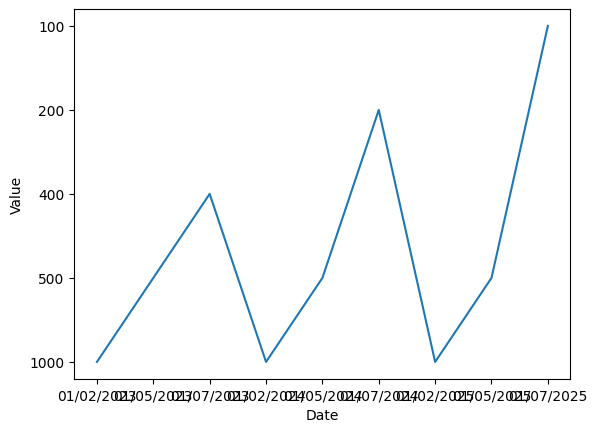

In [ ]:
#Vérification du code généré par Llama (OK après corrections mineures)
import matplotlib.pyplot as plt
import csv

# Load the CSV file
dates = [] #correction : création d'une liste 'dates'
values = [] #correction : création d'une liste 'values'
with open('data.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader: #Correction : transfert du dictionnaire dans les deux listes
        dates.append(row['date'])
        values.append(row['value'])

# Plot the data
plt.plot(dates, values)

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

Llama was prompted to load a .csv file (the one I had to create) and plot a line chart.

Code was generated using my prompt, but generated code did not allow me to create the plot, so I had to slightly modify the code to be able to get a plot: Lama generated a dictionary that could not be directly plotted.

I had to turn the dictionary into a list to get a plot.  